In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

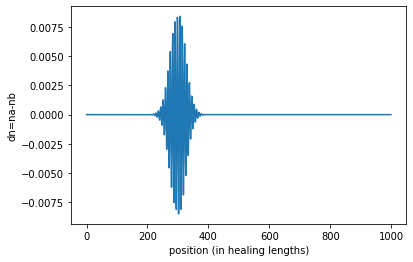

In [13]:
a=[]
b=[]
x=np.arange(0,1000) #gridspace

#gathering results data form results.txt and storing in variables a and b
with open('results.txt','r') as csvfile:
    plots=csv.reader(csvfile, delimiter=',')
    for row in plots:
        a.append(row[::2]) #even row elements are condensate a
        b.append(row[1::2]) #odd row elements are condensate b

a=np.array(a).astype(float)
b=np.array(b).astype(float)

plt.xlabel('position (in healing lengths)')
plt.ylabel('dn=na-nb')
plt.plot(x,a[0]-b[0])

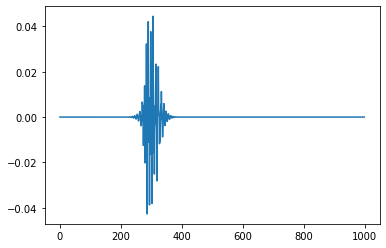

In [11]:
plt.plot(x,a[40]-b[40])